Importing the libaries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
path_of_file = "C:\\Users\\mayan\\Downloads\\zomato.csv\\zomato.csv"
df = pd.read_csv(path_of_file, encoding='ISO-8859-1')

In [5]:
import re

def has_garbage(text):
    return bool(re.search(r'[^\x00-\x7F]', str(text)))  # non-ASCII

garbage_rows = df[df.apply(lambda row: any(has_garbage(val) for val in row), axis=1)]
print(f"Found {len(garbage_rows)} rows with non-ASCII characters")


Found 246 rows with non-ASCII characters


In [6]:
df = df[~df.index.isin(garbage_rows.index)]


In [7]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df.shape

(9305, 21)

In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [12]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")
    print(f"Unique values in {col}: {df[col].nunique()}")
    print("-----------------------------")


restaurant_id: int64
Unique values in restaurant_id: 9305
-----------------------------
restaurant_name: object
Unique values in restaurant_name: 7229
-----------------------------
country_code: int64
Unique values in country_code: 13
-----------------------------
city: object
Unique values in city: 133
-----------------------------
address: object
Unique values in address: 8679
-----------------------------
locality: object
Unique values in locality: 1098
-----------------------------
locality_verbose: object
Unique values in locality_verbose: 1154
-----------------------------
longitude: float64
Unique values in longitude: 7899
-----------------------------
latitude: float64
Unique values in latitude: 8448
-----------------------------
cuisines: object
Unique values in cuisines: 1735
-----------------------------
average_cost_for_two: int64
Unique values in average_cost_for_two: 138
-----------------------------
currency: object
Unique values in currency: 10
-------------------------

In [13]:
df["restaurant_name"].nunique()

7229

the total no of restaurant id 9551 and the total restaurent name is 7446 so that there are some restaurent which may using same name or may false infomation

In [14]:
df["restaurant_name"].value_counts().head(5)

restaurant_name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: count, dtype: int64

There no false infomation its just franchise of the brand like Domino's , Subway etc.

In [15]:
df["country_code"].value_counts()

country_code
1      8575
216     431
214      60
189      59
148      39
14       24
162      22
94       21
184      20
166      20
191      20
30       10
37        4
Name: count, dtype: int64

In [16]:
df.groupby("country_code")["currency"].value_counts().sort_values(ascending=False)

country_code  currency              
1             Indian Rupees(Rs.)        8575
216           Dollar($)                  431
214           Emirati Diram(AED)          60
189           Rand(R)                     59
148           NewZealand($)               39
14            Dollar($)                   24
162           Botswana Pula(P)            22
94            Indonesian Rupiah(IDR)      21
166           Qatari Rial(QR)             20
184           Dollar($)                   20
191           Sri Lankan Rupee(LKR)       20
30            Brazilian Real(R$)          10
37            Dollar($)                    4
Name: count, dtype: int64

By this table we can clearly see the country currency by map the data we can create new column 

In [17]:
map_country = {
    1: "India",
    216: "United States",
    215: "United Kingdom",
    30: "Brazil",
    189: "South Africa",
    214: "United Arab Emirates",
    148: "New Zealand",
    208: "Turkey",
    14: "Australia",
    162: "philippines",
    94: "Indonesia",
    166: "Qatar",
    184: "Singapore",
    191: "Sri Lanka",
    37: "Canada"
}
df["country"] = df["country_code"].map(map_country)

In [18]:
df["country"].isnull().sum()

0

There some recodes with missing and null values but not marks as nun, so by using replace we can map 

In [19]:
df = df.replace({"NAN" : np.nan, "NaN": np.nan, "nan": np.nan})

In [20]:
df.dropna(inplace=True)

In [21]:
df["currency"] =df["currency"].replace({"Botswana Pula(P)":"peso"})

In [22]:
df.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,philippines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,philippines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,philippines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,philippines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,philippines


In [23]:
df["longitude"].nunique() , df["latitude"].nunique()

(7890, 8439)

In [24]:
df["longitude"].value_counts() 

longitude
0.000000     494
77.353663     19
77.230412     11
77.088688     10
77.353574      9
            ... 
77.230102      1
77.230052      1
77.227294      1
77.225420      1
79.850748      1
Name: count, Length: 7890, dtype: int64

In [25]:
df["latitude"].value_counts()

latitude
0.000000     494
28.574309     16
28.574300      9
28.597103      8
28.551456      8
            ... 
28.641017      1
28.641341      1
28.644472      1
28.648229      1
6.923933       1
Name: count, Length: 8439, dtype: int64

so there are some 0.0000 longitude and latitude we will try to fix it


In [26]:
print(f"Only {df[(df["longitude"] == 0.000000) & (df["country"] != "India")].shape[0]} restaurents in other countries have longitude 0.000000.")
print(f"There are {df[(df['longitude'] == 0.000000) & (df['country'] == 'India')].shape[0]} rows with longitude 0.000000 in India.")

Only 2 restaurents in other countries have longitude 0.000000.
There are 492 rows with longitude 0.000000 in India.


In [27]:
print(f"There are {df[df["country"] == 'India'].shape[0]} total restaurants in india.")

There are 8575 total restaurants in india.


So there are 498 restaurents having 0.000 values so we can drop them

In [28]:
df.drop(df[df["longitude"] == 0.000000].index, inplace=True)

In [29]:
df.shape

(8802, 22)

In [30]:
df.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,philippines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,philippines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,philippines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,philippines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,philippines


In [31]:
df["cuisines"].nunique()

1665

In [32]:
df["cuisines"].value_counts().head(10)

cuisines
North Indian                      876
North Indian, Chinese             475
Chinese                           336
Fast Food                         330
North Indian, Mughlai             316
Cafe                              267
Bakery                            190
North Indian, Mughlai, Chinese    187
Bakery, Desserts                  143
Street Food                       139
Name: count, dtype: int64

In [33]:
df["price_range"].value_counts()

price_range
1    4136
2    2870
3    1281
4     515
Name: count, dtype: int64

In [34]:
df["average_cost_for_two"].value_counts()

average_cost_for_two
500     824
300     819
400     785
200     636
600     607
       ... 
5100      1
4400      1
4200      1
8000      1
545       1
Name: count, Length: 137, dtype: int64

C:\Users\mayan\AppData\Local\Temp\ipykernel_13476\1930330978.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="average_cost_for_two", data=df, palette="Set2")


<Axes: xlabel='average_cost_for_two'>

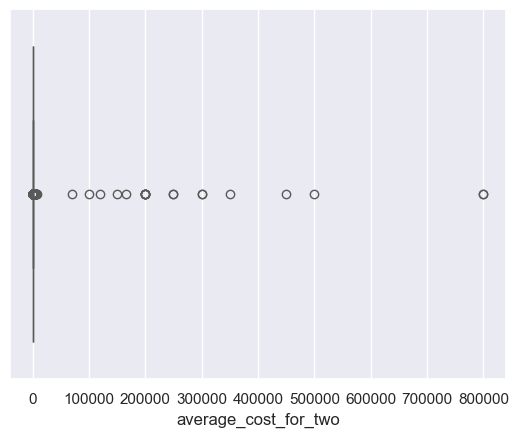

In [35]:
sns.boxplot(x="average_cost_for_two", data=df, palette="Set2")

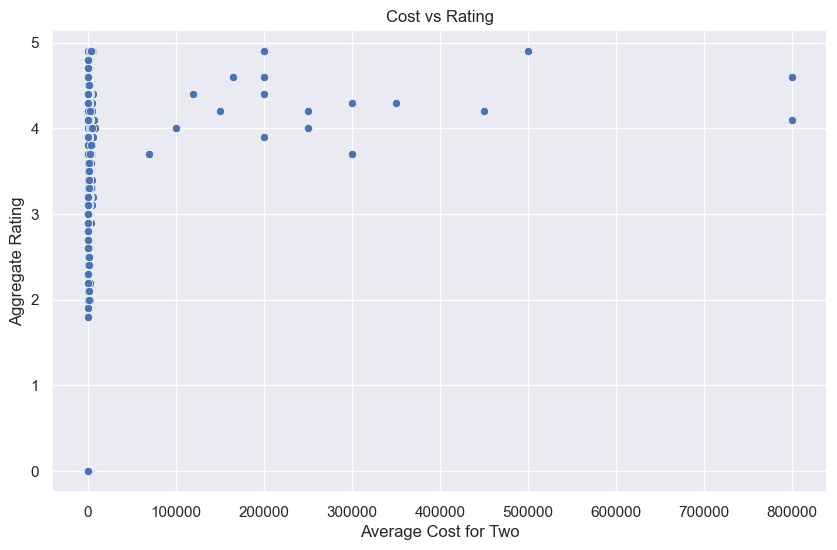

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='average_cost_for_two', y='aggregate_rating')
plt.title('Cost vs Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()


In [37]:
df[df["average_cost_for_two"].between(100000, 800000)]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
9276,18400530,Noah's Barn Coffeenery,94,Bandung,"Jl. Dayang Sumbi No. 2, Dago, Bandung",Dago,"Dago, Bandung",107.612790,-6.887058,"Cafe, Coffee and Tea, Western",...,No,No,No,No,3,4.2,Green,Very Good,22,Indonesia
9278,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",...,No,No,No,No,3,4.0,Green,Very Good,1159,Indonesia
9279,7422633,Talaga Sampireun,94,Jakarta,Jl. Lingkar Luar Barat,Cengkareng,"Cengkareng, Jakarta",106.728508,-6.168467,"Sunda, Indonesian",...,No,No,No,No,3,4.9,Dark Green,Excellent,1662,Indonesia
9280,7405789,Toodz House,94,Jakarta,"Jl. Cipete Raya No. 79, Fatmawati, Jakarta",Fatmawati,"Fatmawati, Jakarta",106.801782,-6.278012,"Cafe, Italian, Coffee and Tea, Western, Indone...",...,No,No,No,No,3,4.6,Dark Green,Excellent,1476,Indonesia
9281,18425821,OJJU,94,Jakarta,"Gandaria City, Lantai Upper Ground, Jl. Sultan...","Gandaria City Mall, Gandaria","Gandaria City Mall, Gandaria, Jakarta",106.783162,-6.244221,Korean,...,No,No,No,No,3,3.9,Yellow,Good,137,Indonesia
9282,7422751,Union Deli,94,Jakarta,"Grand Indonesia Mall, Lantai Ground, East Mall...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.819749,-6.197150,"Desserts, Bakery, Western",...,No,No,No,No,3,4.6,Dark Green,Excellent,903,Indonesia
9283,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,No,No,No,No,3,4.1,Green,Very Good,1498,Indonesia
9284,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,No,No,No,No,3,4.6,Dark Green,Excellent,873,Indonesia
9285,18391256,MONKS,94,Jakarta,"Komplek Graha Boulevard Timur, Summarecon Kela...",Kelapa Gading,"Kelapa Gading, Jakarta",106.911335,-6.163948,"Western, Asian, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,259,Indonesia
9286,7400818,Zenbu,94,Jakarta,"Kota Kasablanka, Lantai Upper Ground, Food Soc...","Kota Kasablanka, Tebet","Kota Kasablanka, Tebet, Jakarta",106.842500,-6.224333,"Japanese, Sushi, Ramen",...,No,No,No,No,3,4.4,Green,Very Good,841,Indonesia


In [38]:
x= df.groupby("currency")["average_cost_for_two"].describe()
x.shape
x

,count,mean,std,min,25%,50%,75%,max
currency,,,,,,,,
Brazilian Real(R$),10.0,123.000000,76.890976,40.0,62.50,105.0,157.5,250.0
Dollar($),470.0,31.740426,42.290304,0.0,10.00,25.0,40.0,500.0
Emirati Diram(AED),60.0,166.416667,109.969532,40.0,88.75,145.0,235.0,500.0
Indian Rupees(Rs.),8083.0,630.629717,607.908583,0.0,300.00,450.0,700.0,8000.0
Indonesian Rupiah(IDR),20.0,290250.000000,204440.668269,70000.0,191250.00,200000.0,312500.0,800000.0
NewZealand($),39.0,70.641026,37.891457,20.0,50.00,60.0,90.0,200.0
Qatari Rial(QR),20.0,223.750000,147.905331,50.0,107.50,185.0,262.5,550.0
Rand(R),59.0,419.220339,425.801276,110.0,250.00,330.0,430.0,3210.0
Sri Lankan Rupee(LKR),19.0,2342.105263,1053.204522,1000.0,1650.00,2000.0,2750.0,4500.0


In [39]:
currency_rates = {
    'Indian Rupees(Rs.)': 1,
    'Dollar($)': 85,                
    'Emirati Diram(AED)': 23,
    'Brazilian Real(R$)': 15,
    'Indonesian Rupiah(IDR)': 0.0052,
    'NewZealand($)': 51,
    'Pounds(£)': 105,
    'Qatari Rial(QR)': 22.8,
    'Rand(R)': 4.5,
    'Sri Lankan Rupee(LKR)': 0.27,
    'Turkish Lira(TL)': 2.5,
    'peso': 4.9  
}
df["average_cost_for_two_in_rs"] = df.apply(lambda x : x["average_cost_for_two"]* currency_rates.get(x["currency"], 1), axis=1)

In [40]:
df["average_cost_for_two_in_rs"].describe()

count     8802.000000
mean       816.038287
std       1313.425954
min          0.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      42500.000000
Name: average_cost_for_two_in_rs, dtype: float64

In [41]:
df.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country,average_cost_for_two_in_rs
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,philippines,5390.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,philippines,5880.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,philippines,19600.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,philippines,7350.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,philippines,7350.0


In [42]:
df.reset_index(inplace=True, drop=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8802 entries, 0 to 8801
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   restaurant_id               8802 non-null   int64  
 1   restaurant_name             8802 non-null   object 
 2   country_code                8802 non-null   int64  
 3   city                        8802 non-null   object 
 4   address                     8802 non-null   object 
 5   locality                    8802 non-null   object 
 6   locality_verbose            8802 non-null   object 
 7   longitude                   8802 non-null   float64
 8   latitude                    8802 non-null   float64
 9   cuisines                    8802 non-null   object 
 10  average_cost_for_two        8802 non-null   int64  
 11  currency                    8802 non-null   object 
 12  has_table_booking           8802 non-null   object 
 13  has_online_delivery         8802 

In [44]:
df.dropna(inplace = True)

In [45]:
df.to_csv("zomato_cleaned.csv", index=False)

In [46]:
df.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country,average_cost_for_two_in_rs
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,philippines,5390.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,philippines,5880.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,philippines,19600.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,philippines,7350.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,philippines,7350.0


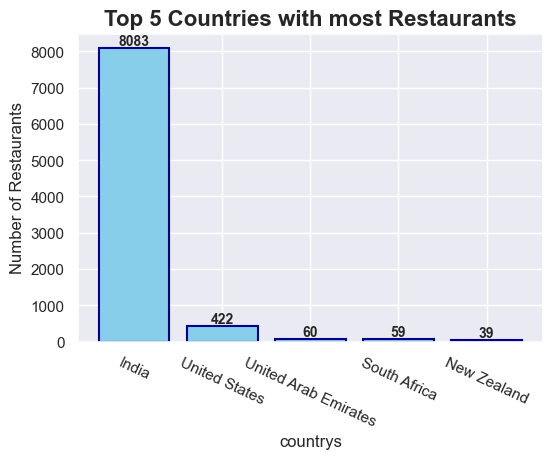

In [110]:
country_most = df["country"].value_counts().head(5)
plt.figure(figsize=(6,4))
bar = plt.bar(data = df , x = country_most.index, height = country_most.values,
               color='skyblue', edgecolor = "darkblue", linewidth=1.5)
for bars in bar:
    height = bars.get_height()
    plt.text(bars.get_x()+ bars.get_width()/2, height + 0.5, 
             f'{height}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title("Top 5 Countries with most Restaurants", fontsize=16, fontweight='bold')
plt.xlabel("countrys")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=335)
plt.show()

Text(0.5, 0, 'Dencity of Restaurants')

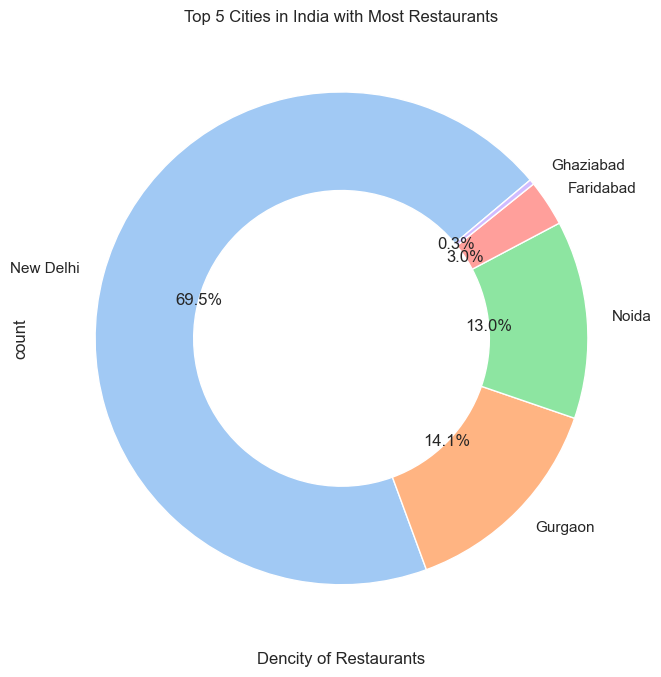

In [86]:
df[df["country"] == "India"]["city"].value_counts().head(5).plot(kind="pie", figsize=(8, 8), autopct='%1.1f%%', startangle=40, colors=sns.color_palette("pastel"), title="Top 5 Cities in India with Most Restaurants",wedgeprops={'width': 0.4})
plt.xlabel("Dencity of Restaurants")

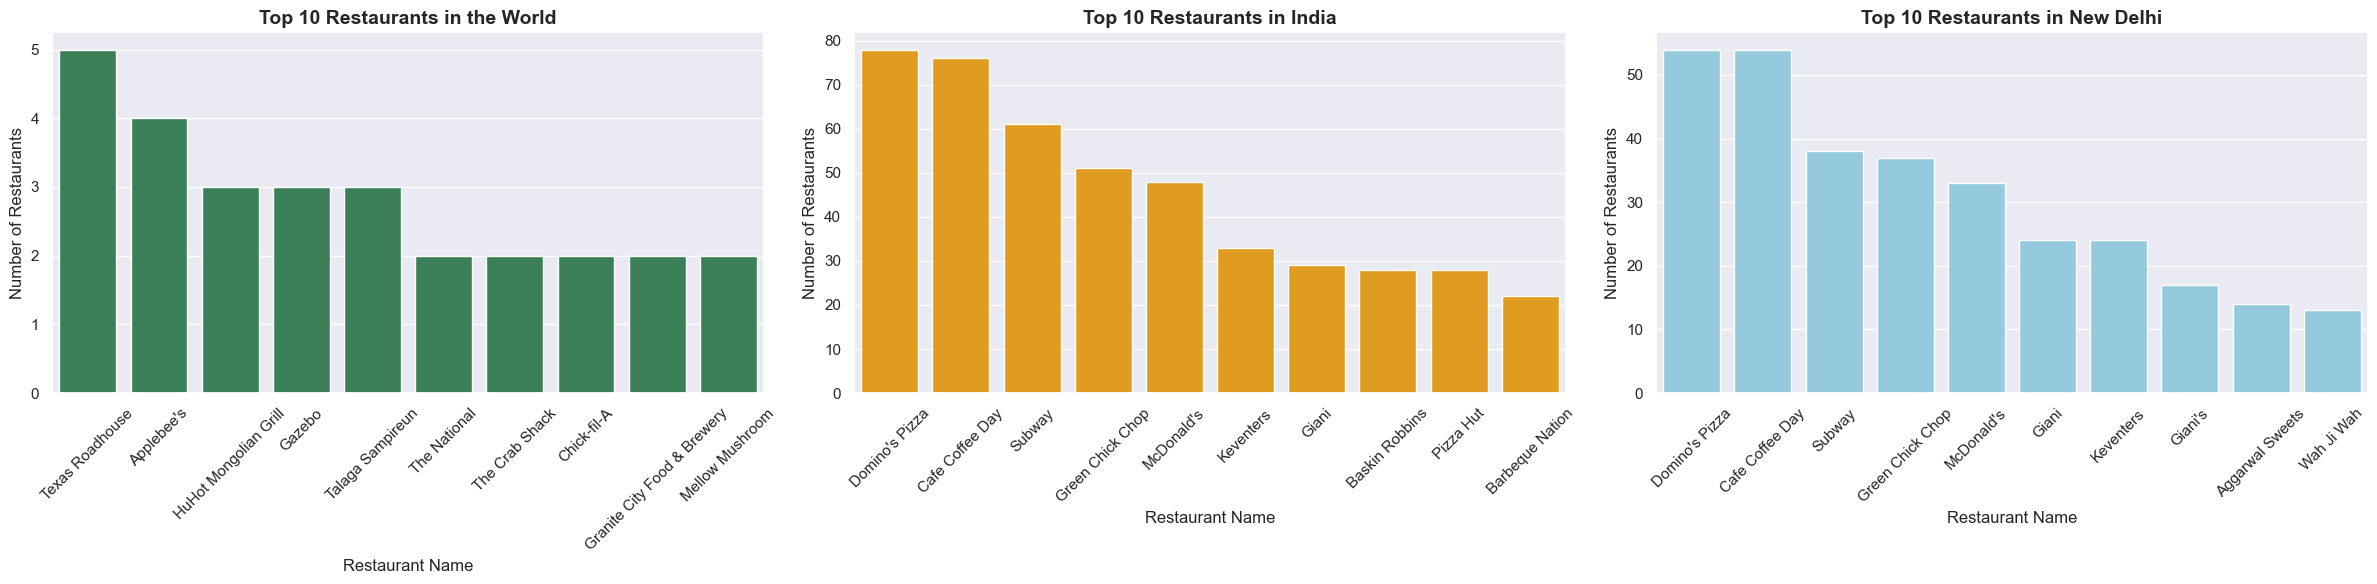

In [124]:
top_10_restaurant_in_Delhi = df[(df["country"] == "India") & (df["city"] == "New Delhi")]["restaurant_name"].value_counts().head(10)
top_10_restaurant_in_india = df[df["country"] == "India"]["restaurant_name"].value_counts().head(10)
top_10_restaurant_in_world  = df[df["country"] != "India"]["restaurant_name"].value_counts().head(10)

# create a figure with subplots
fig, axes = plt.subplots(1,3, figsize=(24, 6))
# plot top 10 restaurants in world
sns.barplot(x = top_10_restaurant_in_world.index, y = top_10_restaurant_in_world.values, ax = axes[0], color="seagreen")
axes[0].set_title("Top 10 Restaurants in the World", fontweight = "bold", fontsize=14)
axes[0].set_xlabel("Restaurant Name")
axes[0].set_ylabel("Number of Restaurants")
axes[0].tick_params(axis='x', rotation=45)

# plot top 10 restaurants in India
sns.barplot(x = top_10_restaurant_in_india.index , y = top_10_restaurant_in_india.values, ax= axes[1], color= "orange")
axes[1].set_title("Top 10 Restaurants in India", fontweight = "bold", fontsize=14)
axes[1].set_xlabel("Restaurant Name")
axes[1].set_ylabel("Number of Restaurants")
axes[1].tick_params(axis='x', rotation=45)

# plot top 10 restaurants in New Delhi
sns.barplot(x = top_10_restaurant_in_Delhi.index , y = top_10_restaurant_in_Delhi.values , ax = axes[2], color = "skyblue")
axes[2].set_title("Top 10 Restaurants in New Delhi", fontweight = "bold", fontsize=14)
axes[2].set_xlabel("Restaurant Name")
axes[2].set_ylabel("Number of Restaurants")
axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



In [131]:
data_of_india =df[df["country"] == "India"]

In [133]:
data_of_india.shape

(8083, 23)

In [136]:
data_of_india.head(6)

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country,average_cost_for_two_in_rs
562,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,3,3.9,Yellow,Good,140,India,850.0
563,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,2,3.6,Yellow,Good,94,India,500.0
564,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,2,4.0,Green,Very Good,87,India,400.0
565,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,3,4.2,Green,Very Good,177,India,1000.0
566,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",...,No,No,No,4,4.3,Green,Very Good,133,India,2500.0
567,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,...,No,No,No,4,4.0,Green,Very Good,41,India,2500.0


In [138]:
data_of_india["cuisines"].nunique()

1299

Text(0, 0.5, 'Cuisines')

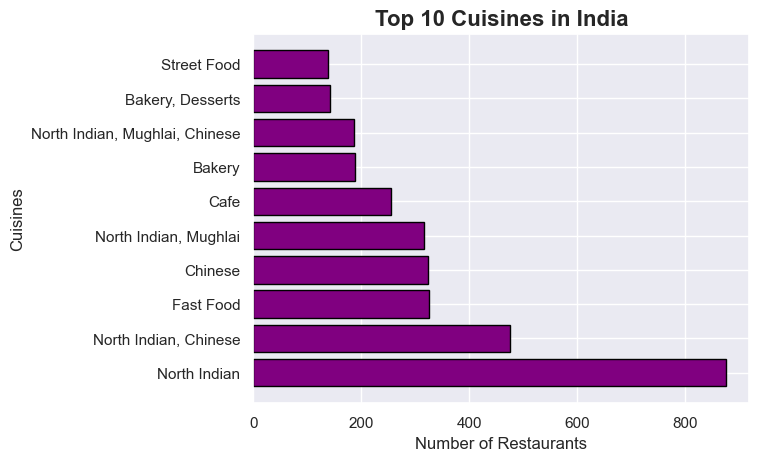

In [169]:
plt.barh(data_of_india["cuisines"].value_counts().head(10).index, 
       data_of_india["cuisines"].value_counts().head(10).values, 
       color='purple', edgecolor='black')
plt.title("Top 10 Cuisines in India", fontsize=16, fontweight='bold')
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines")


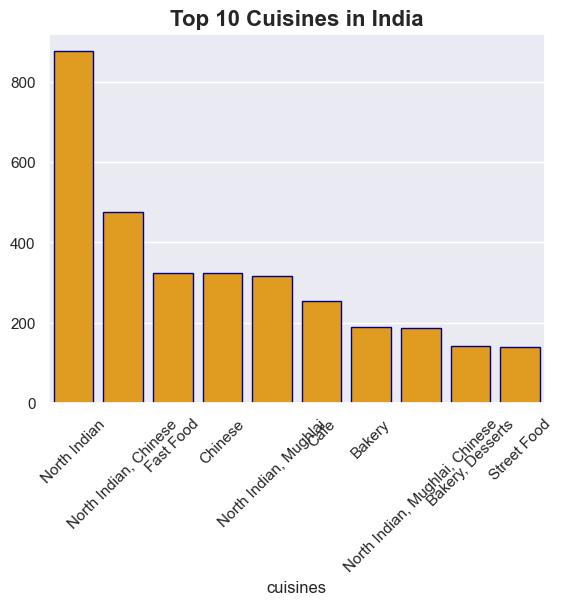

<Figure size 600x400 with 0 Axes>

In [167]:

d = data_of_india["cuisines"].value_counts().head(10)
sns.barplot( x = d.index, y = d.values, color = "orange", edgecolor = "darkblue", linewidth=1)
plt.title("Top 10 Cuisines in India", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.figure(figsize= (6,4))
plt.show()

1852

C:\Users\mayan\AppData\Local\Temp\ipykernel_13476\1870946269.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="aggregate_rating", data=df, palette="Set2")


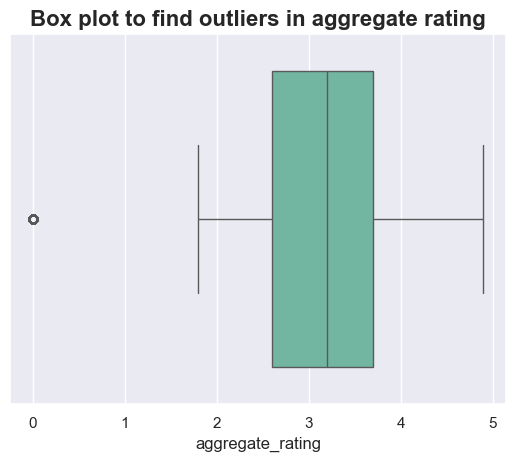

<Figure size 300x300 with 0 Axes>

In [179]:
sns.boxplot(x="aggregate_rating", data=df, palette="Set2")
plt.title("Box plot to find outliers in aggregate rating", fontsize=16, fontweight='bold')
plt.figure(figsize = (3,3))
plt.show()

In [ ]:
df.

In [181]:
df[df["aggregate_rating"] == 0.0]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country,average_cost_for_two_in_rs
31,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",...,No,No,No,3,0.0,White,Not rated,1,Brazil,1050.0
185,18453427,Frick's Tap,216,Davenport,"1402 W 3rd Street, IA 52802",Davenport,"Davenport, Davenport",-90.594665,41.522536,"American, Bar Food, BBQ",...,No,No,No,2,0.0,White,Not rated,2,United States,2125.0
186,17793744,Los Agaves,216,Davenport,"4882 Utica Ridge Rd, Davenport, IA 52807",Davenport,"Davenport, Davenport",-90.515431,41.570943,Mexican,...,No,No,No,2,0.0,White,Not rated,3,United States,2125.0
352,18491935,Nosh Mahal,216,Pocatello,"303 E Alameda Road, ID 83201",Pocatello,"Pocatello, Pocatello",-112.448530,42.891174,"Indian, Persian",...,No,No,No,2,0.0,White,Not rated,1,United States,2125.0
772,9299,Aggarwal Sweet Corner,1,Faridabad,"Badarpur Border Chowk Post, Badarpur Border, F...",Badarpur Border,"Badarpur Border, Faridabad",77.302742,28.496292,Mithai,...,No,No,No,1,0.0,White,Not rated,1,India,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,18428504,The Hangout-Deli,1,Noida,"320-A, 3rd Floor, The Great India Place Mall, ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.323213,28.567751,"Continental, Lebanese, Mexican",...,No,No,No,3,0.0,White,Not rated,0,India,1000.0
8508,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,No,No,No,1,0.0,White,Not rated,1,India,400.0
8509,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,No,No,No,2,0.0,White,Not rated,3,India,600.0
8510,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,No,No,No,2,0.0,White,Not rated,0,India,500.0


In [176]:
df["aggregate_rating"].value_counts().sort_index(ascending=False)

aggregate_rating
4.9      51
4.8      20
4.7      31
4.6      64
4.5      82
4.4     126
4.3     153
4.2     196
4.1     247
4.0     239
3.9     308
3.8     364
3.7     398
3.6     436
3.5     455
3.4     471
3.3     467
3.2     499
3.1     488
3.0     438
2.9     373
2.8     312
2.7     249
2.6     191
2.5     110
2.4      87
2.3      44
2.2      26
2.1      15
2.0       7
1.9       2
1.8       1
0.0    1852
Name: count, dtype: int64

AttributeError: 'Series' object has no attribute 'columns'

cuisines                                restaurant_id  restaurant_name        country_code  city       address                                                                                locality                     locality_verbose                        longitude  latitude   average_cost_for_two  currency            has_table_booking  has_online_delivery  is_delivering_now  switch_to_order_menu  price_range  aggregate_rating  rating_color  rating_text  votes  country  average_cost_for_two_in_rs
Afghani                                 302577         Kabul Delhi            1             New Delhi  I-83, Central Market, Lajpat Nagar 2, New Delhi                                        Lajpat Nagar 2               Lajpat Nagar 2, New Delhi               77.244512  28.570251  550                   Indian Rupees(Rs.)  No                 Yes                  No                 No                    2            2.9               Orange        Average      39     India    550.0            

In [112]:
df["country"].value_counts()

country
India                   8083
United States            422
United Arab Emirates      60
South Africa              59
New Zealand               39
Australia                 24
philippines               22
Singapore                 20
Indonesia                 20
Qatar                     20
Sri Lanka                 19
Brazil                    10
Canada                     4
Name: count, dtype: int64

C:\Users\mayan\AppData\Local\Temp\ipykernel_13476\1010332618.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country', data=df, order=df['country'].value_counts().index, palette='viridis')


<Axes: xlabel='country', ylabel='count'>

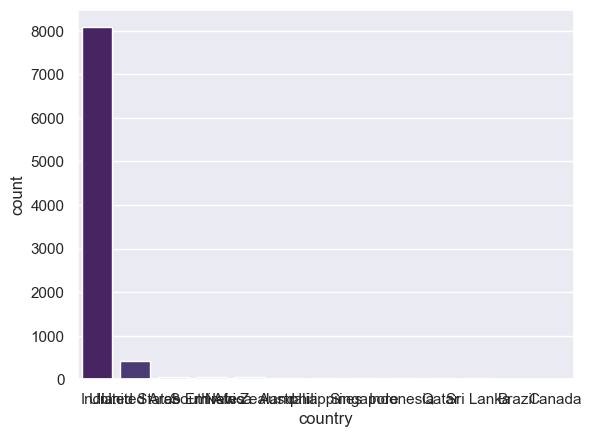

In [47]:
sns.countplot(x='country', data=df, order=df['country'].value_counts().index, palette='viridis')